In [136]:
#Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score , mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [54]:
#Data Analysis
data = pd.read_csv('C:/Users/shubh/Downloads/insurance.csv')

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [57]:
data.shape

(1338, 7)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

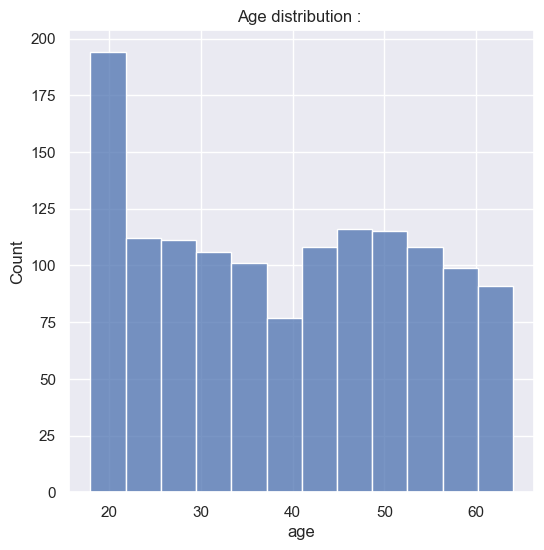

In [78]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(data['age'])
plt.title('Age distribution : ')
plt.show()

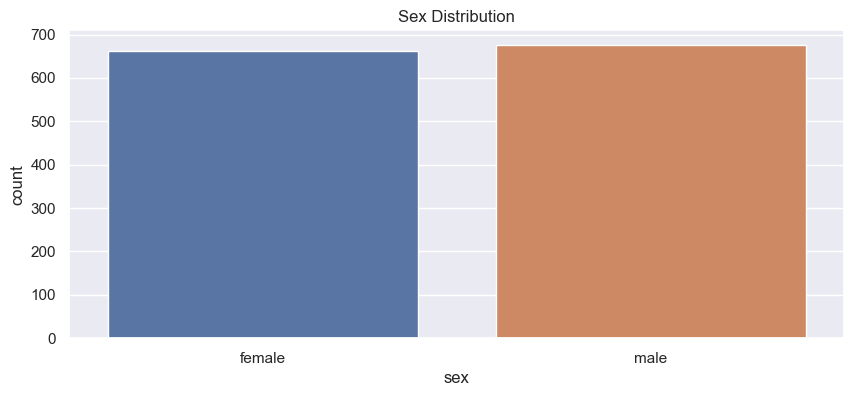

In [74]:
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='sex',hue='sex')
plt.title('Sex Distribution')
plt.show()

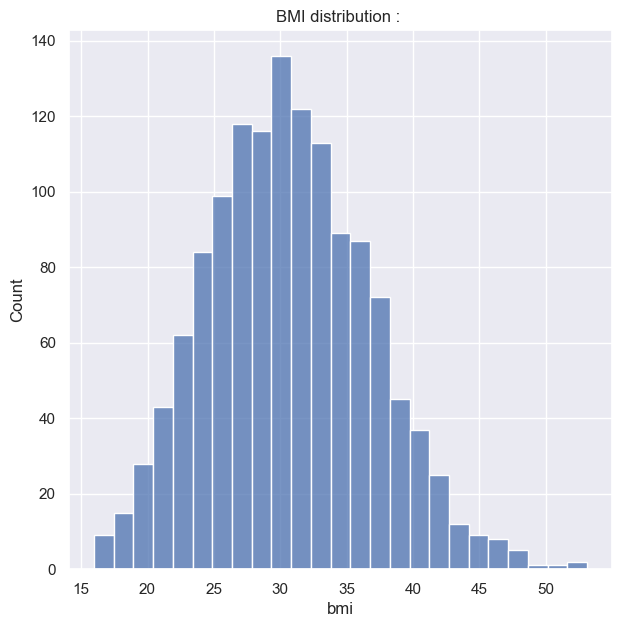

In [76]:
sns.set()
plt.figure(figsize=(7,7))
sns.histplot(data['bmi'])
plt.title('BMI distribution : ')
plt.show()

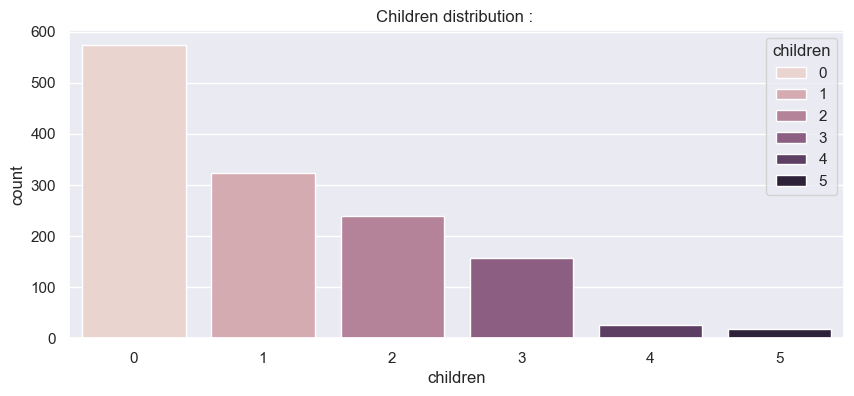

In [80]:
plt.figure(figsize=(10,4))
sns.countplot(data=data,x='children', hue='children')
plt.title('Children distribution : ')
plt.show()

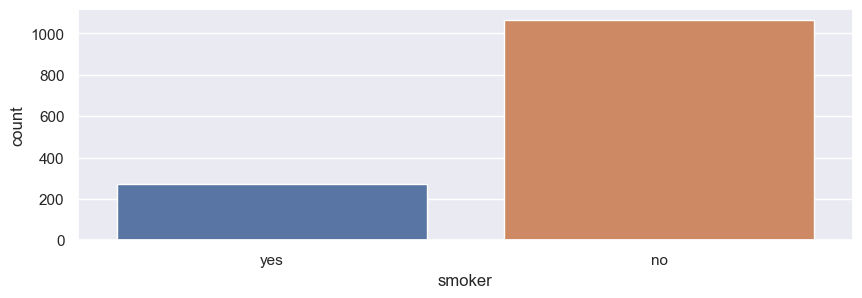

In [94]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='smoker',hue='smoker')
plt.show()

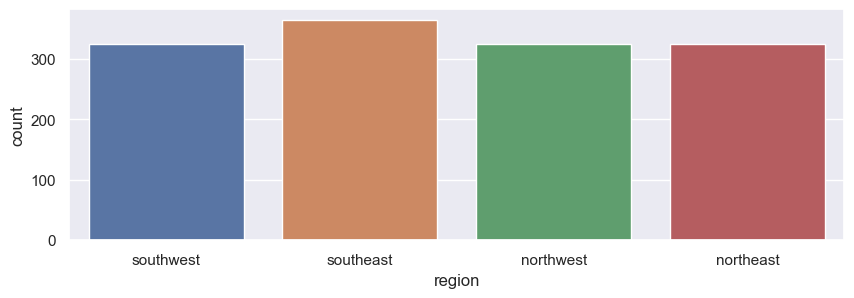

In [92]:
plt.figure(figsize=(10,3))
sns.countplot(data=data,x='region',hue='region')
plt.show()

<Figure size 600x300 with 0 Axes>

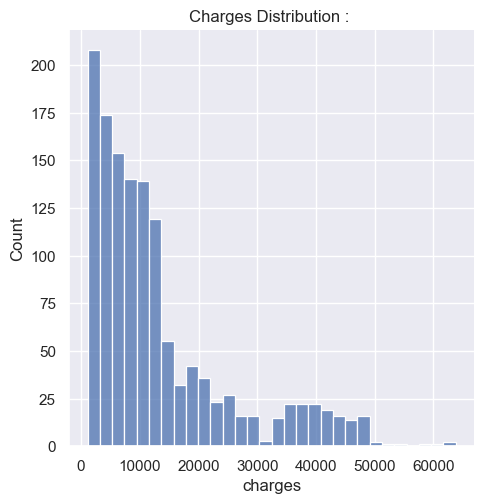

In [96]:
plt.figure(figsize=(6,3))
sns.displot(data['charges'])
plt.title('Charges Distribution : ')
plt.show()

In [98]:
#Data Preprocessing
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
le= LabelEncoder()
for col in data.columns:
    if( data[col].dtype=='object'):
        data[col] = le.fit_transform(data[col])

In [110]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [112]:
#splitting the x and y data
X= data.drop('charges',axis=1)
Y= data['charges']

In [114]:
print(X,Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns] 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [116]:
#splitting the data into training and test data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.22,random_state=2)

In [118]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1043, 6) (295, 6)


In [120]:
#model trainng
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [122]:
train_pred= model.predict(X_train)


In [126]:
#checking the accuracy of the model
r2_metric = r2_score(Y_train,train_pred)
print(f'The R2 Metric score of the Training data is {r2_metric}')

The R2 Metric score of the Training data is 0.7500936147936345


In [128]:
#checking the accuracy of the test data 
test_pred= model.predict(X_test)
r2_metric1 = r2_score(Y_test,test_pred)
print(f'The R2 Metric Score of the Test data is {r2_metric1}')

The R2 Metric Score of the Test data is 0.751736740574529


In [140]:
#Predictive System for the model
input_1 = int(input())
input_2 = int(input())
input_3 = float(input())
input_4 = int(input())
input_5 = int(input())
input_6 = int(input())
features = [input_1,input_2,input_3,input_4,input_5,input_6]
numpy = np.asarray(features)
reshaped = numpy.reshape(1,-1)
prediction= model.predict(reshaped)
print(f'The Prediction Price of the Medical insurance is : ${prediction[0]}')

 18
 1
 33.770
 1
 0
 2


The Prediction Price of the Medical insurance is : $3878.772968190975
